In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
# Definir la ruta de la base de datos
path_db = r"E:\ISBI2025\data paper"

# Leer el archivo CSV
df = pd.read_csv(os.path.join(path_db,'supervised_hyper-kvasir_SData.csv'),index_col=0)

In [2]:
tensor = torch.load("30 MAE Embedding New")

In [23]:
# Fit TSNE on the tensor

tsne = TSNE(n_components=2, perplexity=50, random_state=42) 
embeddings_2d = tsne.fit_transform(tensor)    

C:\Users\dbrav\AppData\Local\Temp\ipykernel_7280\1791668917.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


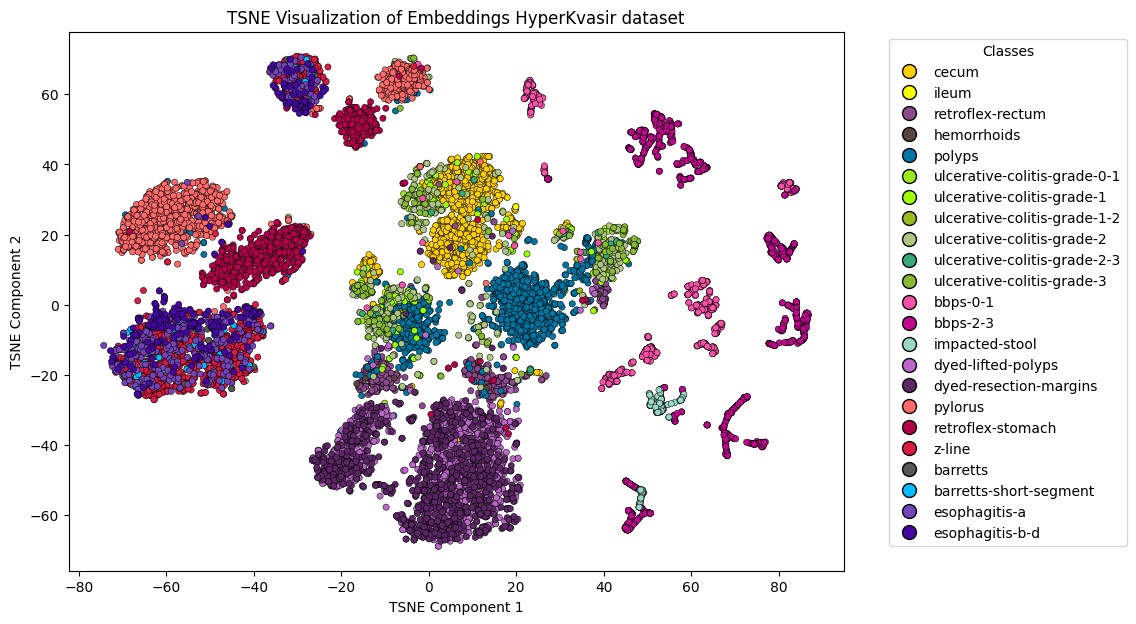

In [77]:
map_categories ={2: "#be098d",  #bbps-2-3 
                13: "#0076A2", #polyps                        
                8:"#FFD000", # cecum
                3:"#BA68C8", #dyed-lifted-polyps
                9:"#FF6B6B", #pylorus
                4:"#5d2766", #dyed-resection-margins
                10:"#dc1b44", #z-line
                15:"#B6004C", #retroflex-stomach
                1:"#F752A7", #bbps-0-1
                21:"#adc683", #ulcerative-colitis-grade-2
                11:"#7445b8", #esophagitis-a
                14:"#8A4A8C",  #retroflex-rectum
                12:"#4606a3",  #esophagitis-b-d
                20:"#a0fc00", #ulcerative-colitis-grade-1
                22:"#87bb32", #ulcerative-colitis-grade-3
                7:"#98D8C8", #impacted-stool
                16:"#00bdfe", #barretts-short-segment
                0:"#575757",  #barretts
                17:"#9ee91d", #ulcerative-colitis-grade-0-1
                19:"#36A97A", #ulcerative-colitis-grade-2-3
                18:"#98BD1F", #ulcerative-colitis-grade-1-2
                6:"#f6ff04", #ileum
                5:"#5B443F" #hemorrhoids  
                }
df["color"] = df["GT"].replace(map_categories)

# Crear la figura
plt.figure(figsize=(10, 7))

# Scatter plot con colores de df["color"], tamaño de los puntos reducido, y borde negro
scatter = plt.scatter(
    embeddings_2d[:, 0], embeddings_2d[:, 1], 
    c=df["color"], edgecolor='black',linewidths=0.35, s=20,  # s=40 ajusta el tamaño de los puntos
    cmap='tab10'
)

# Crear los handles y etiquetas manualmente
unique_labels = df["label"].unique()
unique_colors = df["color"].unique()
# Crear leyenda manualmente para las clases
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=10, markeredgecolor='black')
           for label, color in zip(unique_labels, unique_colors)]

# Agregar la leyenda y ajustar su posición
plt.legend(handles=handles, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Etiquetas de los ejes y título
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("TSNE Visualization of Embeddings HyperKvasir dataset")
plt.savefig('tsne_visualization.png', format='png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

C:\Users\dbrav\AppData\Local\Temp\ipykernel_7280\1356384923.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


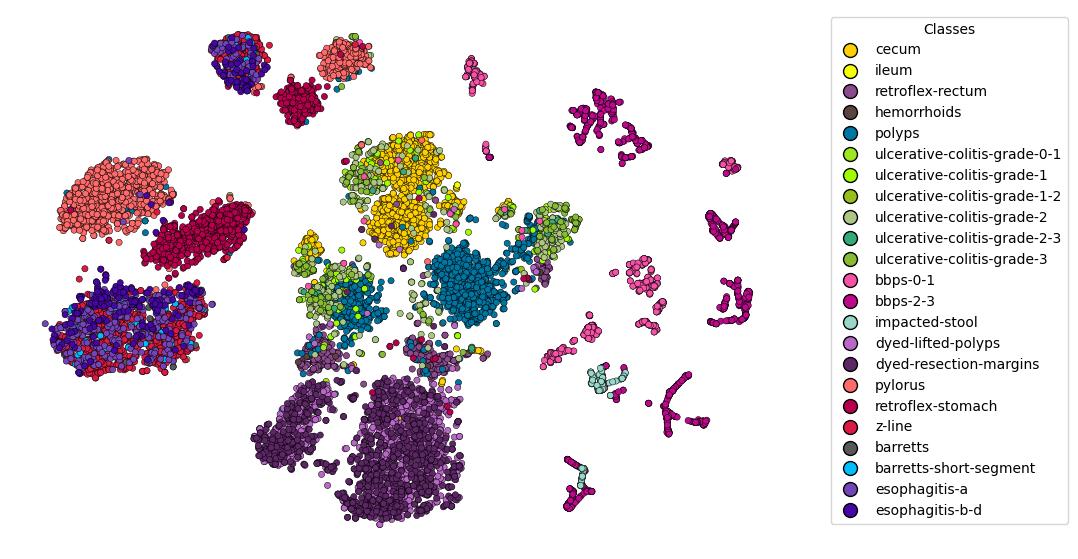

In [78]:

# Crear la figura
plt.figure(figsize=(10, 7))

# Scatter plot con colores de df["color"], tamaño de los puntos reducido, y borde negro
scatter = plt.scatter(
    embeddings_2d[:, 0], embeddings_2d[:, 1], 
    c=df["color"], edgecolor='black', linewidths=0.35, s=20,  # s=20 ajusta el tamaño de los puntos
    cmap='tab10'
)

# Crear los handles y etiquetas manualmente
unique_labels = df["label"].unique()
unique_colors = df["color"].unique()

# Crear leyenda manualmente para las clases
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=10, markeredgecolor='black')
           for label, color in zip(unique_labels, unique_colors)]

# Agregar la leyenda y ajustar su posición
plt.legend(handles=handles, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar los ejes y el título
plt.axis('off')

# Guardar la imagen como PNG sin bordes, ejes, ni títulos
plt.savefig('tsne_visualization_no_axes.png', format='png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico (opcional)
plt.show()
